# Wprowadzenie

Skrypt pokazuje jak użyć pakietu SciKit do wizualizacji danych na przykładzie zestawu danych zawierającego obrazy cyfr pisanych ręcznie.

In [19]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

In [20]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

# Wczytanie danych

In [21]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

# Wyświetlenie przykładowych cyfr

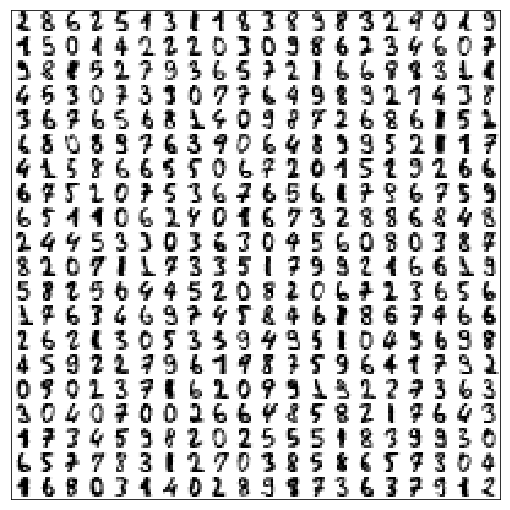

In [22]:
M = 20
image = np.zeros((10 * M, 10 * M))
order = np.random.permutation(N)
for i in range(M):
    for j in range(M):
        image[10*i+1:10*i+9, 10*j+1:10*j+9] = X[order[i*M+j], :].reshape((8, 8))

plt.figure(figsize=(9, 9))
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

# Rzut na dwie losowo wybrane osie

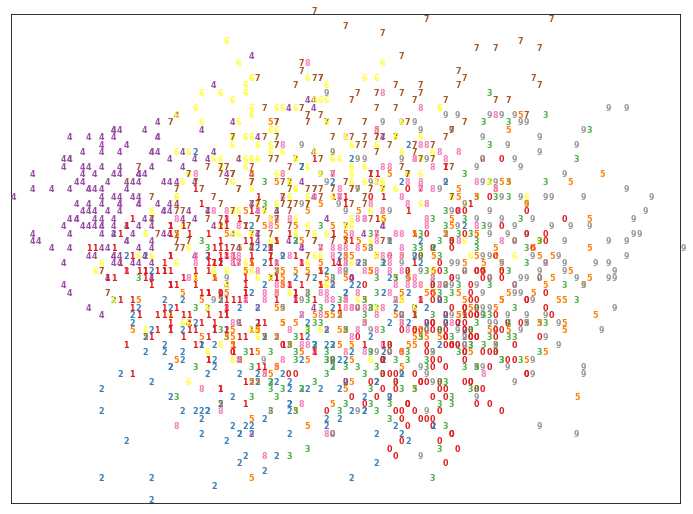

In [23]:
X_projected = random_projection.SparseRandomProjection(n_components=2).fit_transform(X)
plot_digits(X_projected, digits.target)

# Principal Component Analysis (PCA)

In [30]:
help(decomposition.PCA)

Help on class PCA in module sklearn.decomposition.pca:

class PCA(sklearn.decomposition.base._BasePCA)
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of components to keep.
 |      if n_components is not set all components are kept::
 |  
 |          n_components == min(n_samples, n

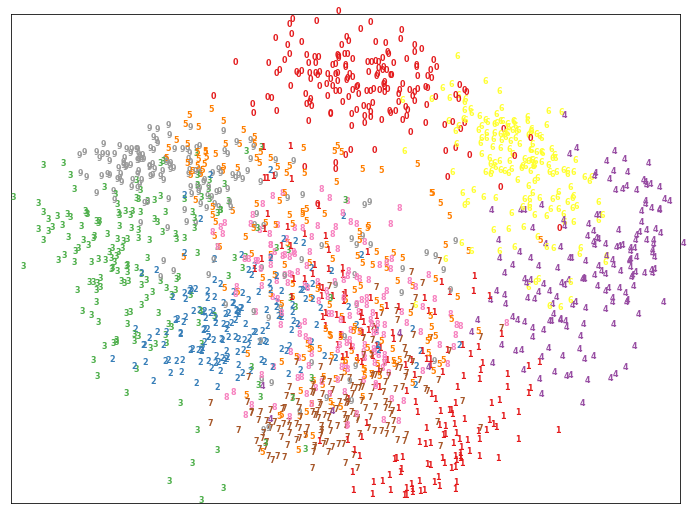

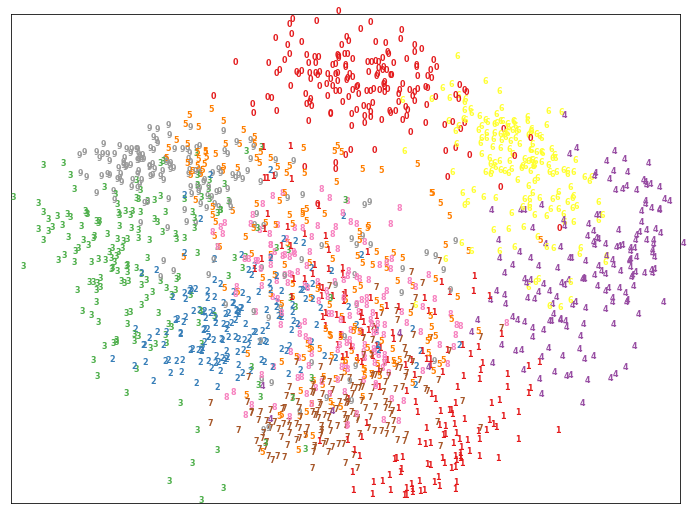

In [34]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
plot_digits(X_pca, digits.target)

X_pca = decomposition.PCA(n_components=2, svd_solver='full').fit_transform(X)
plot_digits(X_pca_uncorrelated, digits.target)

In [35]:
help(decomposition.KernelPCA)

Help on class KernelPCA in module sklearn.decomposition.kernel_pca:

class KernelPCA(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Kernel Principal component analysis (KPCA)
 |  
 |  Non-linear dimensionality reduction through the use of kernels (see
 |  :ref:`metrics`).
 |  
 |  Read more in the :ref:`User Guide <kernel_PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=None
 |      Number of components. If None, all non-zero components are kept.
 |  
 |  kernel : "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed"
 |      Kernel. Default="linear".
 |  
 |  degree : int, default=3
 |      Degree for poly kernels. Ignored by other kernels.
 |  
 |  gamma : float, default=1/n_features
 |      Kernel coefficient for rbf and poly kernels. Ignored by other
 |      kernels.
 |  
 |  coef0 : float, default=1
 |      Independent term in poly and sigmoid kernels.
 |      Ignored by other kernels.
 |  
 |  kernel_params : mapping of string to

# Kernel Principal Component Analysis (KPCA)

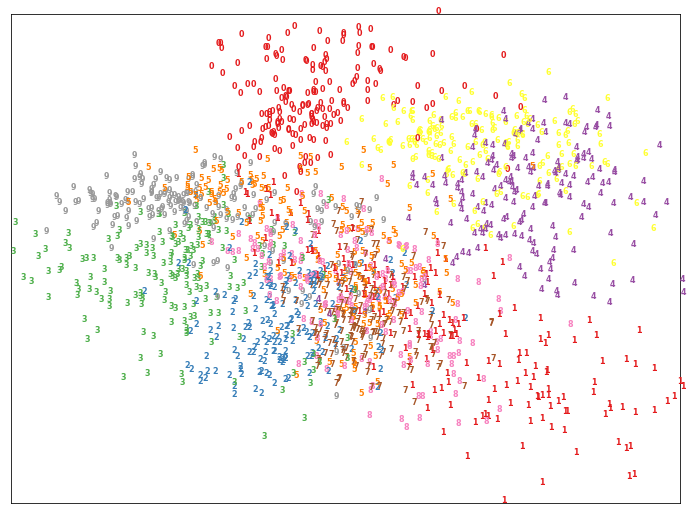

In [58]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="poly", degree=3, gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

In [59]:
help(manifold.Isomap)

Help on class Isomap in module sklearn.manifold.isomap:

class Isomap(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Isomap Embedding
 |  
 |  Non-linear dimensionality reduction through Isometric Mapping
 |  
 |  Read more in the :ref:`User Guide <isomap>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : integer
 |      number of neighbors to consider for each point.
 |  
 |  n_components : integer
 |      number of coordinates for the manifold
 |  
 |  eigen_solver : ['auto'|'arpack'|'dense']
 |      'auto' : Attempt to choose the most efficient solver
 |      for the given problem.
 |  
 |      'arpack' : Use Arnoldi decomposition to find the eigenvalues
 |      and eigenvectors.
 |  
 |      'dense' : Use a direct solver (i.e. LAPACK)
 |      for the eigenvalue decomposition.
 |  
 |  tol : float
 |      Convergence tolerance passed to arpack or lobpcg.
 |      not used if eigen_solver == 'dense'.
 |  
 |  max_iter : integer
 |      Maximum number of iterations

# Isomap

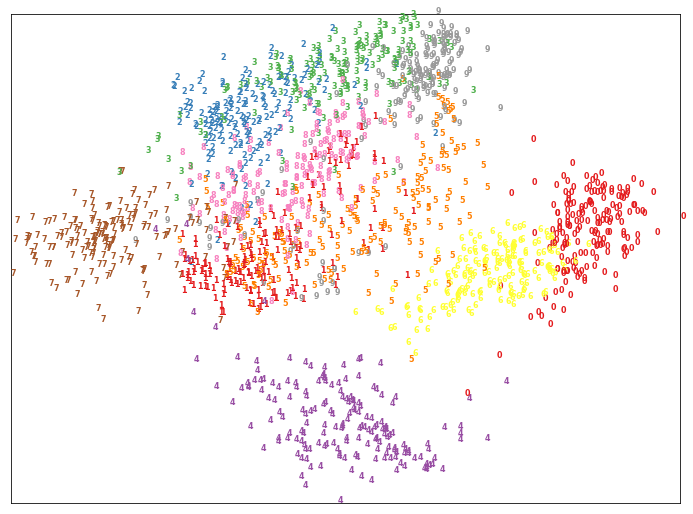

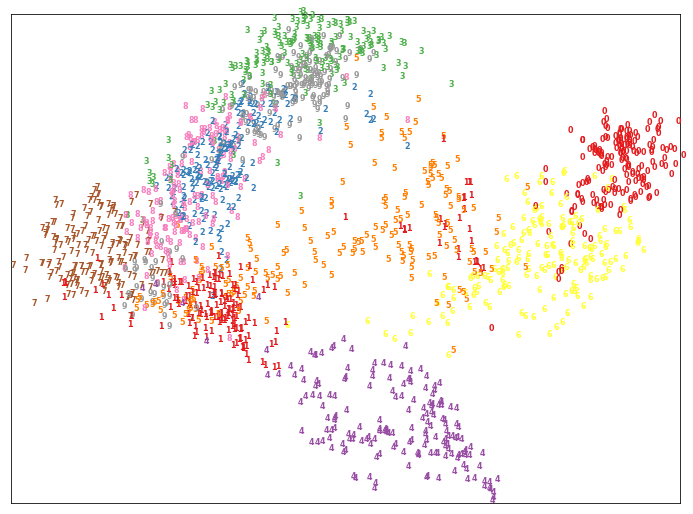

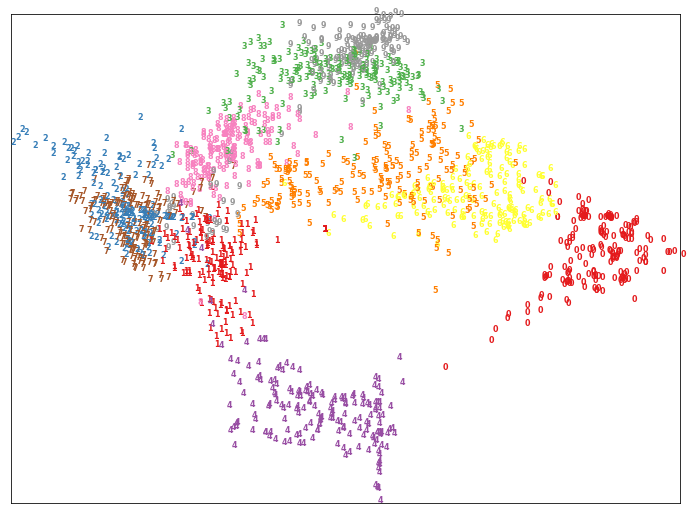

In [63]:
X_iso = manifold.Isomap(30, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

X_iso = manifold.Isomap(10, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

X_iso = manifold.Isomap(5, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

# Locally Linear Embedding (LLE)

In [66]:
help(manifold.LocallyLinearEmbedding)

Help on class LocallyLinearEmbedding in module sklearn.manifold.locally_linear:

class LocallyLinearEmbedding(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Locally Linear Embedding
 |  
 |  Read more in the :ref:`User Guide <locally_linear_embedding>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : integer
 |      number of neighbors to consider for each point.
 |  
 |  n_components : integer
 |      number of coordinates for the manifold
 |  
 |  reg : float
 |      regularization constant, multiplies the trace of the local covariance
 |      matrix of the distances.
 |  
 |  eigen_solver : string, {'auto', 'arpack', 'dense'}
 |      auto : algorithm will attempt to choose the best method for input data
 |  
 |      arpack : use arnoldi iteration in shift-invert mode.
 |                  For this method, M may be a dense matrix, sparse matrix,
 |                  or general linear operator.
 |                  Warning: ARPACK can be unstable for some problems.  

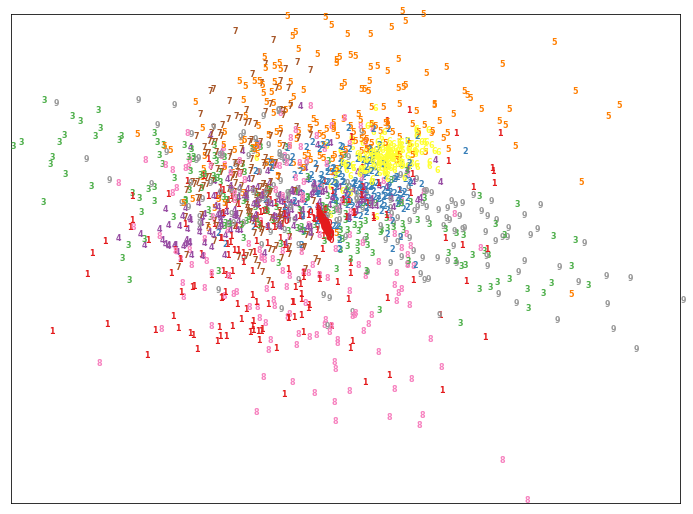

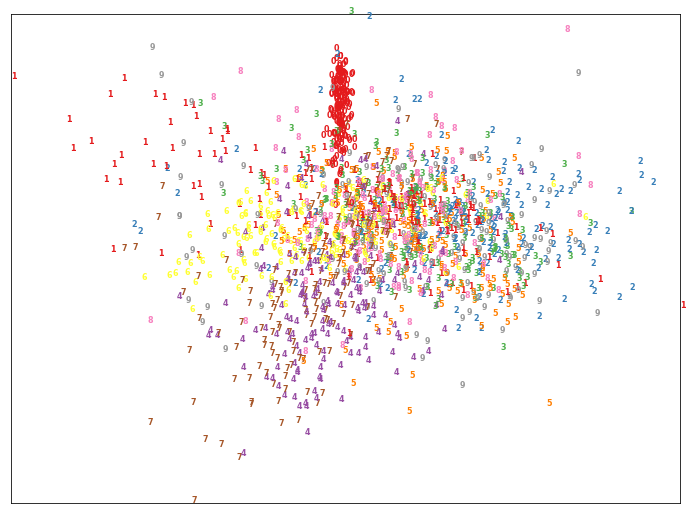

In [74]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

X_lle = manifold.LocallyLinearEmbedding(30, n_components=2, reg=0.0001).fit_transform(X)
plot_digits(X_lle, digits.target)

In [75]:
help(manifold.MDS)

Help on class MDS in module sklearn.manifold.mds:

class MDS(sklearn.base.BaseEstimator)
 |  Multidimensional scaling
 |  
 |  Read more in the :ref:`User Guide <multidimensional_scaling>`.
 |  
 |  Parameters
 |  ----------
 |  metric : boolean, optional, default: True
 |      compute metric or nonmetric SMACOF (Scaling by Majorizing a
 |      Complicated Function) algorithm
 |  
 |  n_components : int, optional, default: 2
 |      number of dimension in which to immerse the similarities
 |      overridden if initial array is provided.
 |  
 |  n_init : int, optional, default: 4
 |      Number of time the smacof algorithm will be run with different
 |      initialisation. The final results will be the best output of the
 |      n_init consecutive runs in terms of stress.
 |  
 |  max_iter : int, optional, default: 300
 |      Maximum number of iterations of the SMACOF algorithm for a single run
 |  
 |  verbose : int, optional, default: 0
 |      level of verbosity
 |  
 |  eps : floa

# Multidimensional Scaling (MDS)

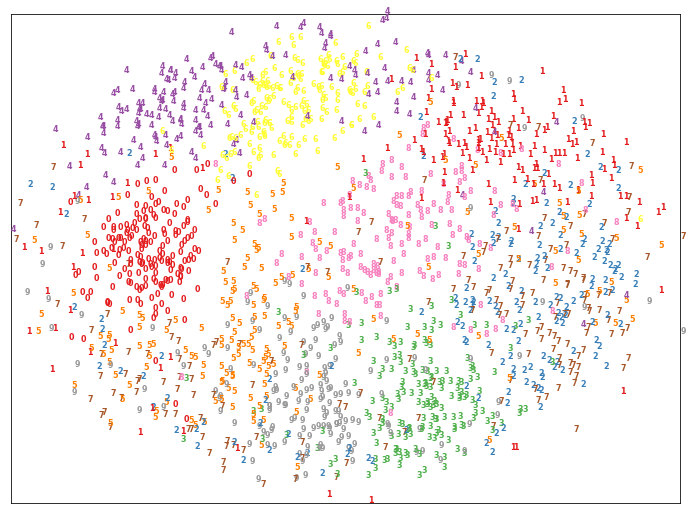

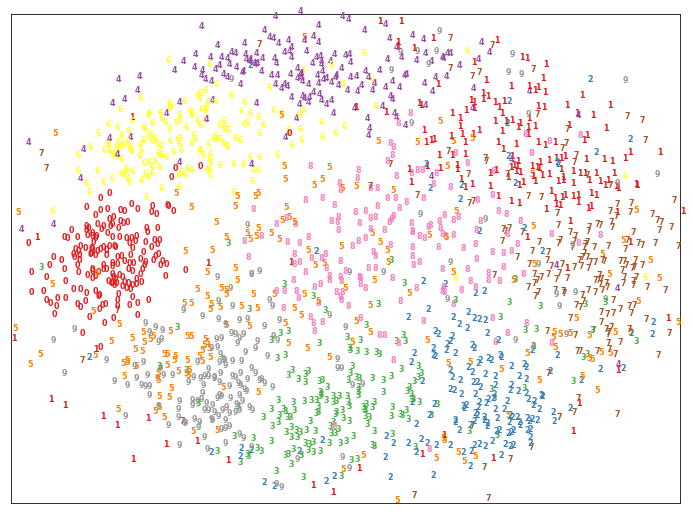

In [83]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

X_mds = manifold.MDS(n_components=2, eps=1e-4,n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

In [80]:
help(manifoldfoldfold.TSNE)

Help on class TSNE in module sklearn.manifold.t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a reasonable amount (e.g. 50)
 |  if the number of features is very high. This will suppress some
 |  noise and speed up the computation of pairwise distances between
 |  samples. For more tips see Laurens van der Maaten's FAQ [2].
 |  
 |  Read more in the 

# t-distributed Stochastic Neighbor Embedding (t-SNE)

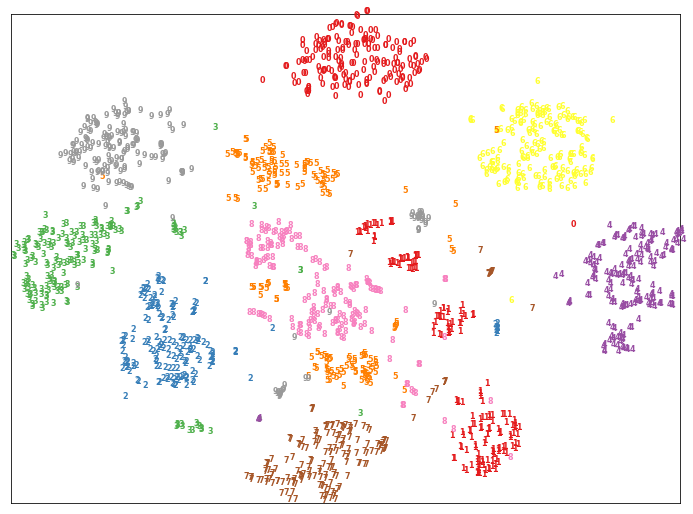

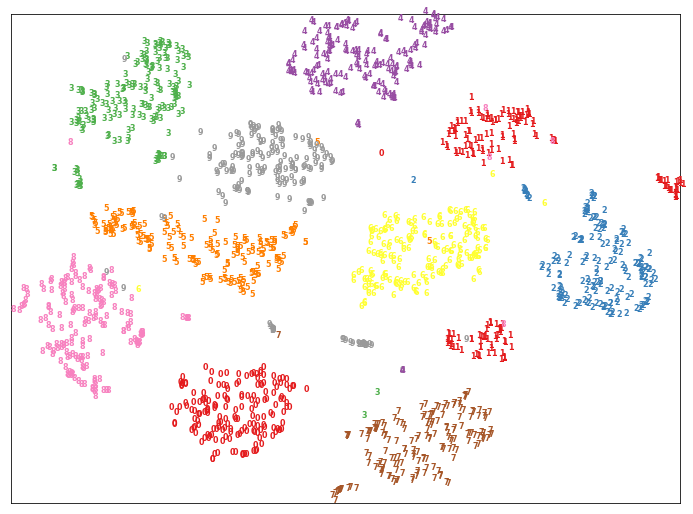

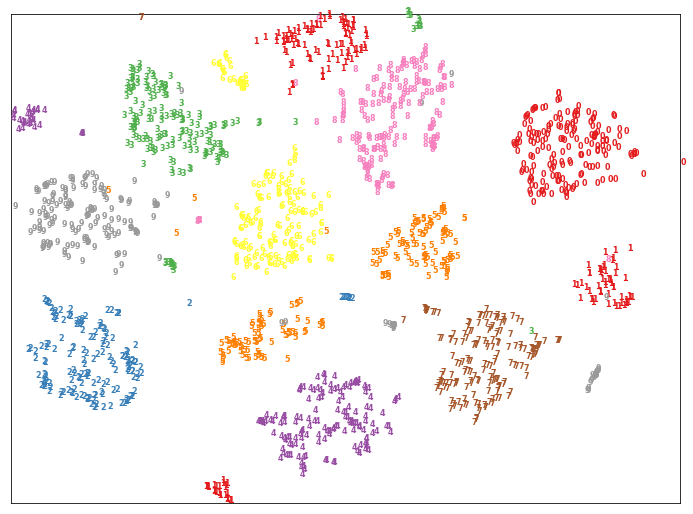

In [90]:
X_tsne = manifold.TSNE(n_components=2, init='pca', perplexity=30).fit_transform(X)
plot_digits(X_tsne, digits.target)

X_tsne = manifold.TSNE(n_components=2, init='random', learning_rate=1000).fit_transform(X)
plot_digits(X_tsne, digits.target)

X_tsne = manifold.TSNE(n_components=2, init='random').fit_transform(X)
plot_digits(X_tsne, digits.target)